In [97]:
import pandas as pd
import numpy as np
import os
from matplotlib.pyplot import *
from IPython.display import display, HTML
import glob
import scanpy as sc
import pandas as pd
import seaborn as sns
import scipy.stats

%matplotlib inline


In [98]:
file = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/ipsc_singlecell_analysis/sarkar2019_yoruba_ipsc/sarkar2019_yoruba_ipsc.scanpy.dimreduction.harmonyPCA.clustered.h5'
adata_clustered = sc.read(file)

file = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/ipsc_singlecell_analysis/sarkar2019_yoruba_ipsc/sarkar2019_yoruba_ipsc.scanpy.h5'
adatafull = sc.read(file)

in_dir = os.path.dirname(file)

adatafull.obs['cluster_id'] = adata_clustered.obs['louvain'].astype(str)
adatafull.obsm['X_umap'] = adata_clustered.obsm['X_umap']

Only considering the two last: ['.clustered', '.h5'].
Only considering the two last: ['.clustered', '.h5'].


In [99]:
adatafull.obs['day'] = 'day0'
adatafull.obs['donor_long_id'] = adatafull.obs['chip_id']

In [100]:
adatafull.obs.head()

,experiment,well,batch,cell_number,concentration,tra1.60,individual.1,individual.2,individual.3,individual.4,...,reads,avg_dp,min_dp,snps_w_min,valid_id,cell_id,qc_passing,cluster_id,day,donor_long_id
index,,,,,,,,,,,,,,,,,,,,,
NA18517.02192018.A01,02192018,A01,b6,1,0.777191,True,NA18517,NA18913,NA19193,NA19210,...,2448,0.01,1,1402,True,02192018.A01,True,2,day0,NA18517
NA19210.02192018.A03,02192018,A03,b6,1,1.429865,True,NA18517,NA18913,NA19193,NA19210,...,5360,0.02,1,2262,True,02192018.A03,True,1,day0,NA19210
NA18913.02192018.A04,02192018,A04,b6,1,1.990741,True,NA18517,NA18913,NA19193,NA19210,...,7104,0.02,1,3019,True,02192018.A04,True,0,day0,NA18913
NA19193.02192018.A05,02192018,A05,b6,1,2.545412,True,NA18517,NA18913,NA19193,NA19210,...,9445,0.03,1,3881,True,02192018.A05,True,0,day0,NA19193
NA19193.02192018.A06,02192018,A06,b6,1,2.300550,True,NA18517,NA18913,NA19193,NA19210,...,7960,0.03,1,3352,True,02192018.A06,True,0,day0,NA19193


In [101]:
#subsample

fraction = 1.0
adata = sc.pp.subsample(adatafull, fraction, copy=True)

adata.raw = adata

In [102]:
fig_format = 'png'
# fig_format = 'pdf'
sc.set_figure_params(dpi_save=200,format=fig_format)
#rcParams['figure.figsize'] = 5,4
rcParams['figure.figsize'] = 5,4

In [103]:
plotting_fcn = sc.pl.umap

... storing 'cluster_id' as categorical
... storing 'day' as categorical


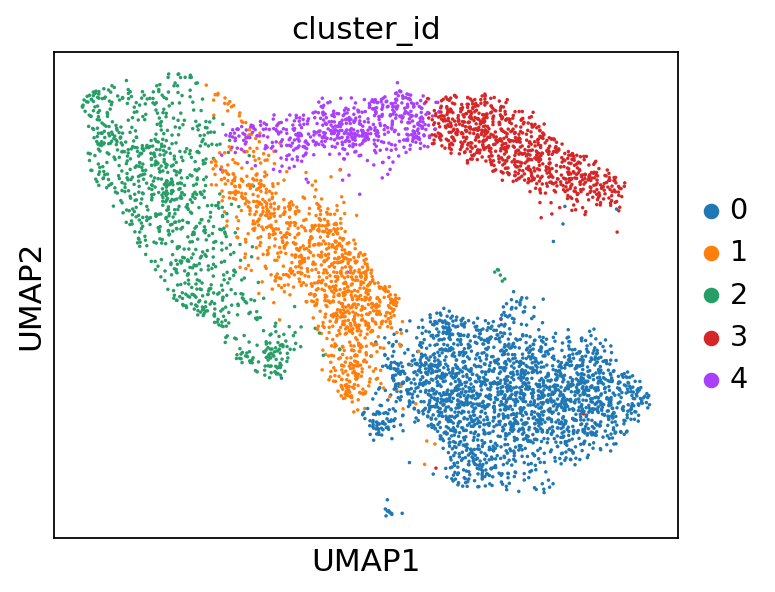

In [104]:
plotting_fcn(adata, color='cluster_id',size=10)

In [105]:
adata.var

""
ENSG00000000003
ENSG00000000005
ENSG00000000419
ENSG00000000457
ENSG00000000460
...
ENSG00000273291
ENSG00000273303
ENSG00000273395
ENSG00000273439


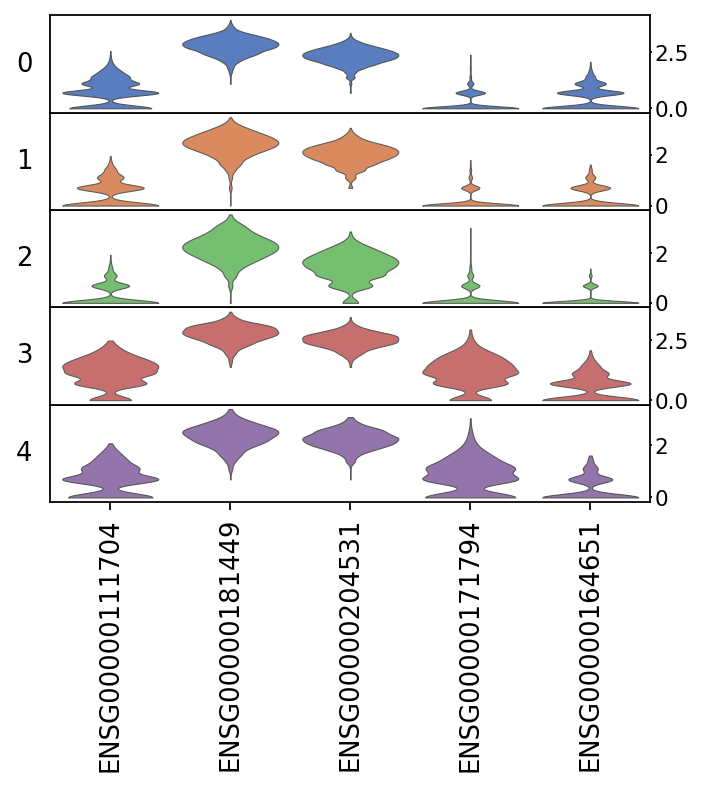

In [106]:
# gene_list = ['NANOG','SOX2','POU5F1','UTF1','SP8']
gene_list = ['ENSG00000111704','ENSG00000181449','ENSG00000204531','ENSG00000171794','ENSG00000164651']
sc.pl.stacked_violin(adata, gene_list, groupby='cluster_id', figsize=(5,4))

In [107]:
df = adata.obs.groupby(['donor_long_id','experiment','cluster_id'])[['day']].count().fillna(0.0).rename(columns={'day':'count'})
total_counts = adata.obs.groupby(['donor_long_id','experiment'])[['day']].count().rename(columns={'day':'total_count'})

df = df.reset_index()

#.join(donor_total_counts)

df['f_cells'] = df.apply(lambda x: x['count']/total_counts.loc[(x['donor_long_id'],x['experiment']),'total_count'], axis=1)

df = df.dropna()
df.head()

,donor_long_id,experiment,cluster_id,count,f_cells
190,NA18489,09272017,0,2.0,0.285714
191,NA18489,09272017,1,1.0,0.142857
192,NA18489,09272017,2,1.0,0.142857
193,NA18489,09272017,3,0.0,0.000000
194,NA18489,09272017,4,3.0,0.428571


In [108]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/iPSC_scanpy/"

filename = mydir + 'Sarkar_v1_cluster_cell_fractions_by_donor_experiment.csv'
df.to_csv(filename)

In [109]:
sc.tl.rank_genes_groups(adata, groupby='cluster_id', n_genes=1e6)

In [110]:
# group_names = pval_df.columns
group_names = [str(x) for x in range(5)]
df_list = []
for group_name in group_names:
    column_names = ['names','pvals','pvals_adj','logfoldchanges','scores']
    data = [pd.DataFrame(adata.uns['rank_genes_groups'][col])[group_name] for col in column_names]
    temp_df = pd.DataFrame(data, index=column_names).transpose()
    temp_df['cluster_id'] = group_name
    df_list.append(temp_df)
    
diff_expression_df = pd.concat(df_list)


diff_expression_df.head()

,names,pvals,pvals_adj,logfoldchanges,scores,cluster_id
0,ENSG00000166681,0,0,1.03147,54.7038,0
1,ENSG00000124172,0,0,1.02708,54.1708,0
2,ENSG00000087086,0,0,0.83845,51.3347,0
3,ENSG00000154277,0,0,0.958407,51.2798,0
4,ENSG00000067225,0,0,1.25335,51.0799,0


In [111]:
diff_exp_file = mydir + 'Sarkar2019_v1' + '.cluster_expression_markers.tsv'

diff_expression_df.to_csv(diff_exp_file, sep='\t', index=False)
diff_expression_df.query('cluster_id=="0"').to_csv(diff_exp_file.replace('.tsv','.cluster0.tsv'), sep='\t', index=False)
diff_expression_df.query('cluster_id=="1"').to_csv(diff_exp_file.replace('.tsv','.cluster1.tsv'), sep='\t', index=False)
diff_expression_df.query('cluster_id=="2"').to_csv(diff_exp_file.replace('.tsv','.cluster2.tsv'), sep='\t', index=False)
diff_expression_df.query('cluster_id=="3"').to_csv(diff_exp_file.replace('.tsv','.cluster3.tsv'), sep='\t', index=False)
diff_expression_df.query('cluster_id=="4"').to_csv(diff_exp_file.replace('.tsv','.cluster4.tsv'), sep='\t', index=False)